<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_08/Class_008_object_detection_001_Finding_Einstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Matching

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
einstein =  cv2.imread('Einstein.jpg',0)

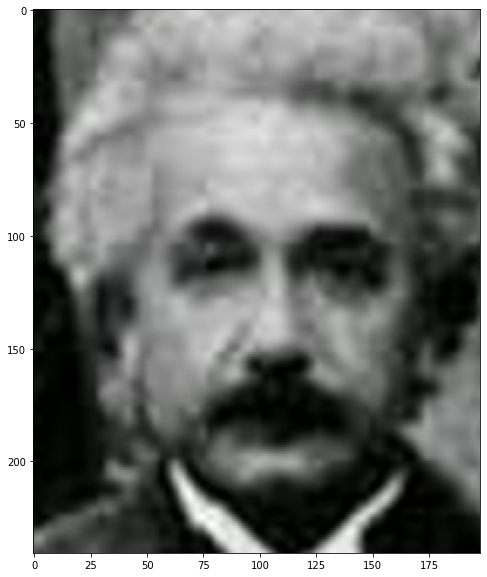

In [ ]:
display((cv2.cvtColor(cv2.imread('Einstein.jpg'), cv2.COLOR_BGR2RGB)))

In [ ]:
solvay_conference = cv2.imread('The Solvay Conference.jpg',0)

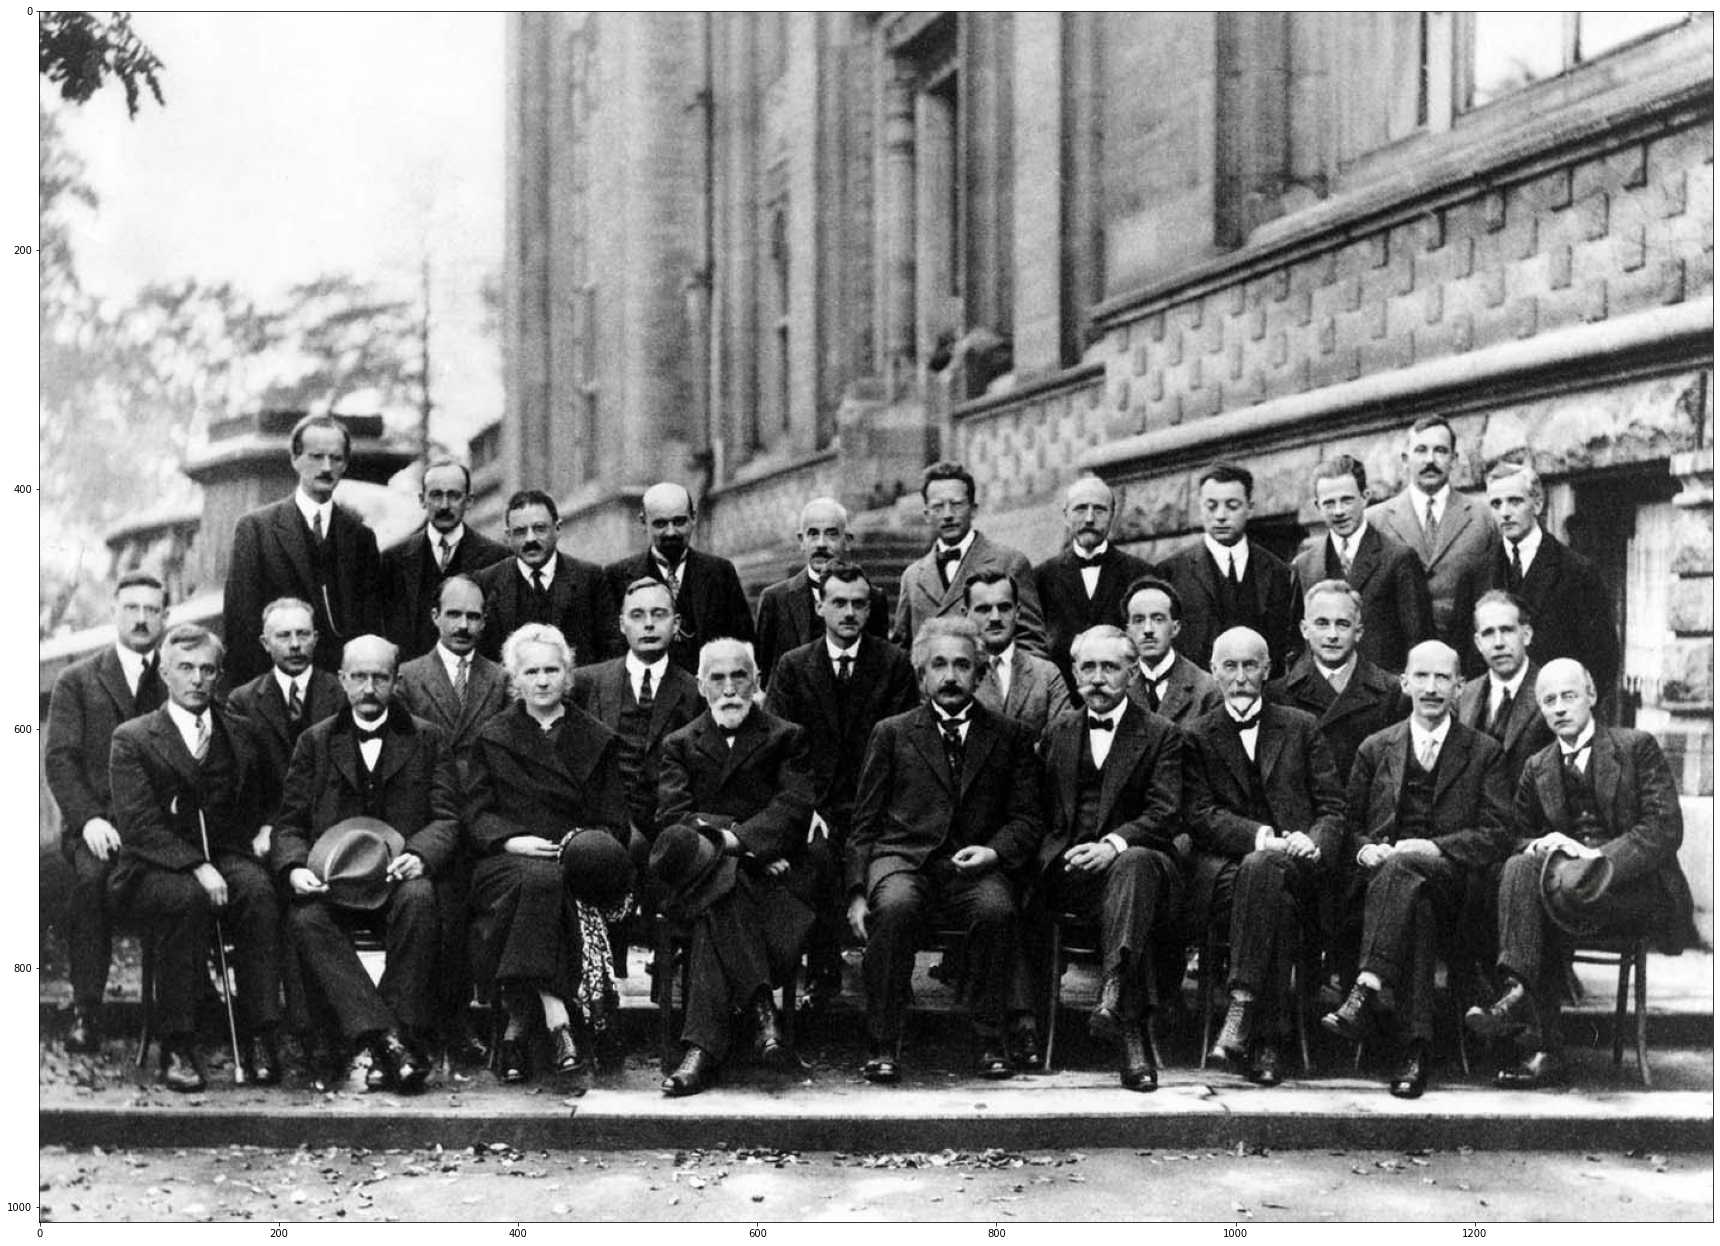

In [ ]:
plt.figure(figsize=(30, 30))
plt.imshow(cv2.cvtColor(cv2.imread('The Solvay Conference.jpg'), cv2.COLOR_BGR2RGB))

--------
# Brute Force Detection with ORB Descriptors

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(einstein,None)
kp2, des2 = orb.detectAndCompute(solvay_conference,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
solvay_conference = cv2.drawMatches(einstein,kp1,solvay_conference,kp2,matches[:50],None,flags=2)

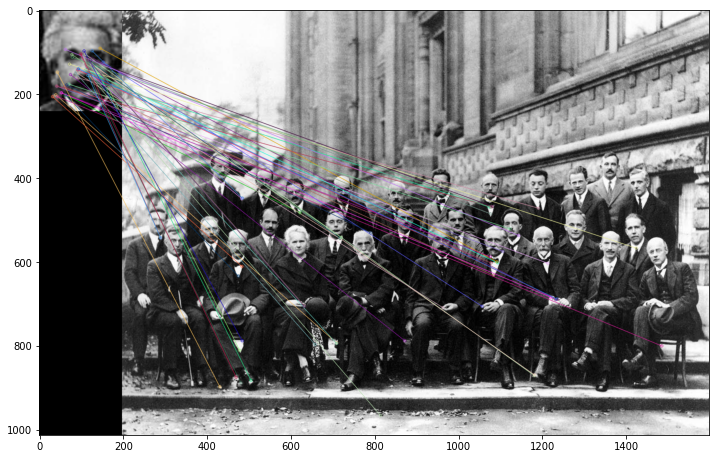

In [ ]:
display(solvay_conference)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [ ]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(einstein,None)
kp2, des2 = sift.detectAndCompute(solvay_conference,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(einstein,kp1,solvay_conference,kp2,good,None,flags=2)

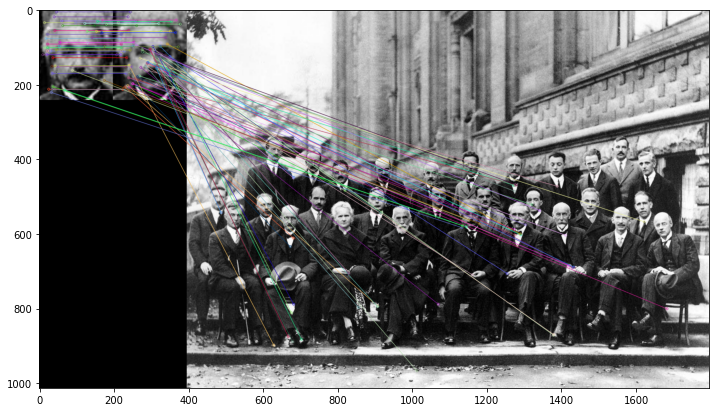

In [ ]:
display(sift_matches)

# FLANN based Matcher

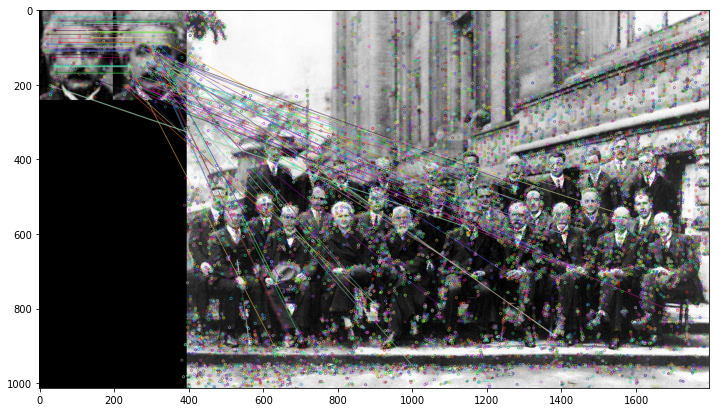

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(einstein,None)
kp2, des2 = sift.detectAndCompute(solvay_conference,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(einstein,kp1,solvay_conference,kp2,good,None,flags=0)

display(flann_matches)

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(einstein,None)
kp2, des2 = sift.detectAndCompute(solvay_conference,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 10)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(einstein,kp1,solvay_conference,kp2,matches,None,**draw_params)

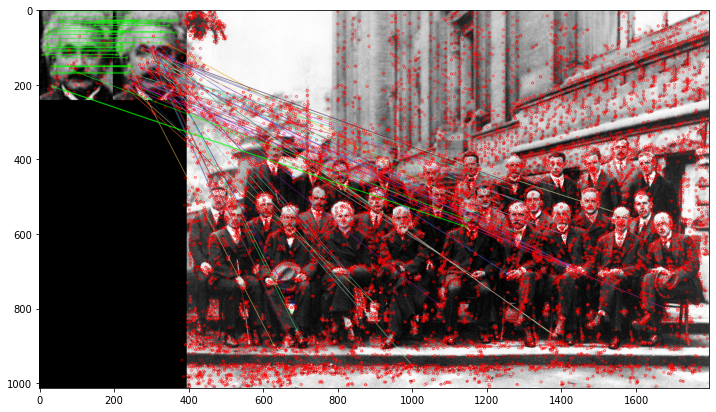

In [ ]:
display(flann_matches)

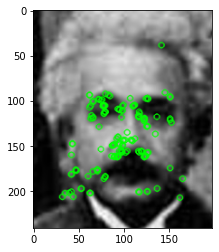

(<matplotlib.image.AxesImage at 0x7fcf9a3eb810>, None)

In [ ]:
img = einstein
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()